<a href="https://colab.research.google.com/github/potdarjs/DSM-Project-5/blob/master/Project_5_Time_Series_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 5 - Data Science Masters

## Time Series Model

## Problem Statement
please pick up the following stocks and generate forecasts accordingly

Stocks:

1. NASDAQ.AAPL
2. NASDAQ.ADP
3. NASDAQ.CBOE
4. NASDAQ.CSCO
5. NASDAQ.EBAY

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.tools.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.arima_model import ARIMA, ARMAResults
import datetime
import sys
import seaborn as sns
import statsmodels
import time
import statsmodels.stats.diagnostic as diag
from statsmodels.tsa.stattools import adfuller
from scipy.stats.mstats import normaltest

from matplotlib.pyplot import acorr
plt.style.use('fivethirtyeight')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('drive/My Drive/data_stocks.csv')

In [0]:
df.shape

(41266, 502)

In [0]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


In [0]:
df['DATE_F'] = df.DATE.apply(lambda x:time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))

In [0]:
df['logsp500']= np.log(df['SP500'])
df['diflogsp500'] = df['logsp500'] - df['logsp500'].shift(periods=-1)
df = df.dropna()

In [0]:
df.shape

(41265, 505)

In [0]:
df.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS,DATE_F,logsp500,diflogsp500
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,39.88,82.03,7.36,50.22,63.86,122.000,53.350,2017-04-03 13:30:00,7.767945,-0.000207
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,39.88,82.03,7.38,50.22,63.74,121.770,53.350,2017-04-03 13:31:00,7.768153,0.000601
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,39.98,82.02,7.36,50.12,63.75,121.700,53.365,2017-04-03 13:32:00,7.767552,-0.000690
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,39.99,82.02,7.35,50.16,63.88,121.700,53.380,2017-04-03 13:33:00,7.768242,-0.000228
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,39.96,82.03,7.36,50.20,63.91,121.695,53.240,2017-04-03 13:34:00,7.768470,-0.000326


In [0]:
data = df[['DATE','DATE_F','SP500','logsp500','diflogsp500']][:-100]
test = df[['DATE','DATE_F','SP500','logsp500','diflogsp500']][-100:]

In [0]:
data.shape

(41165, 5)

In [0]:
data.head()

,DATE,DATE_F,SP500,logsp500,diflogsp500
0,1491226200,2017-04-03 13:30:00,2363.6101,7.767945,-0.000207
1,1491226260,2017-04-03 13:31:00,2364.1001,7.768153,0.000601
2,1491226320,2017-04-03 13:32:00,2362.6799,7.767552,-0.000690
3,1491226380,2017-04-03 13:33:00,2364.3101,7.768242,-0.000228
4,1491226440,2017-04-03 13:34:00,2364.8501,7.768470,-0.000326


In [0]:
?plt.title

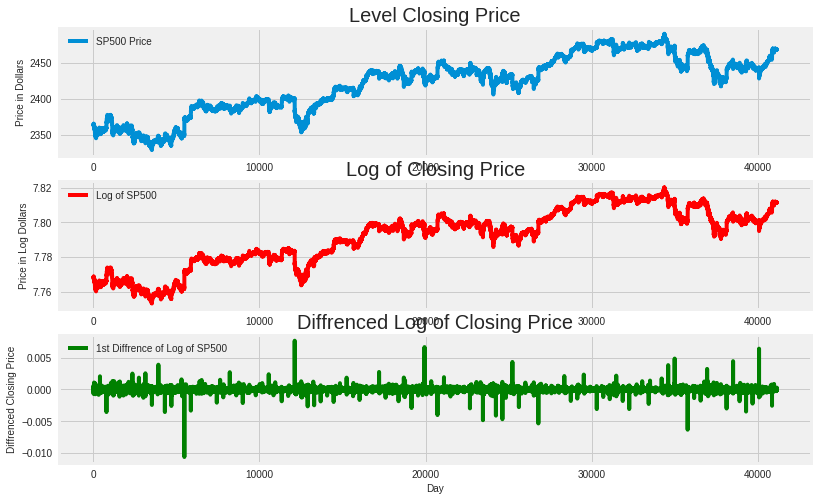

In [0]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(data.SP500, label = "SP500 Price")
plt.title("Level Closing Price", size = 20,)
plt.ylabel("Price in Dollars", size = 10)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(data.logsp500, label = 'Log of SP500', color = 'r')
plt.title("Log of Closing Price", size = 20,)
plt.ylabel("Price in Log Dollars", size = 10)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot( data.diflogsp500, label = '1st Diffrence of Log of SP500', color = 'g')
plt.title("Diffrenced Log of Closing Price", size = 20,)
plt.ylabel("Diffrenced Closing Price", size = 10)
plt.xlabel('Day', size = 10)
plt.legend()

Text(0, 0.5, 'PACF')

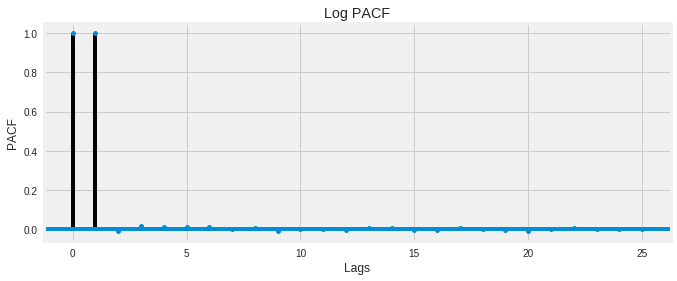

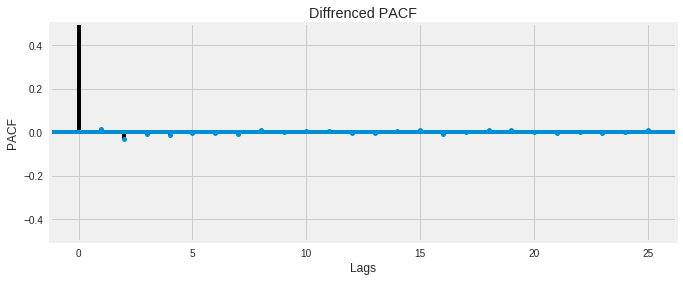

In [0]:
fig, ax = plt.subplots(figsize=(10,4))

plot_pacf(data.logsp500, lags = 25, ax = ax)
ax.set_title('Log PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(10,4))

plot_pacf(data.diflogsp500, lags = 25, ax = ax)
ax.set_title('Diffrenced PACF')
ax.set_ylim(-.5, .5)
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

Text(0, 0.5, 'PACF')

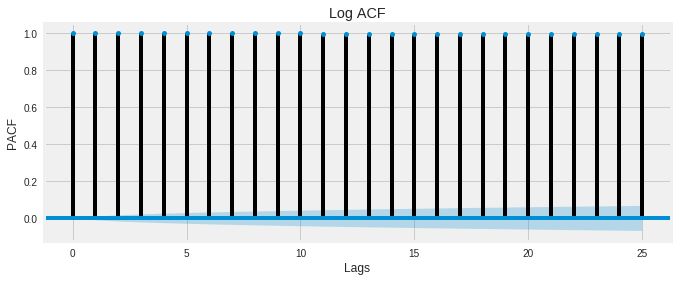

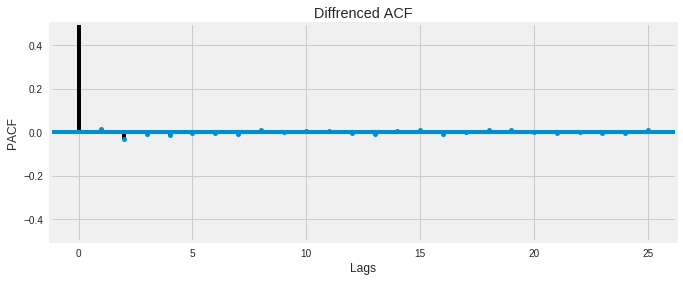

In [0]:
fig, ax = plt.subplots(figsize=(10,4))

plot_acf(data.logsp500, lags = 25, ax = ax)
ax.set_title('Log ACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(10,4))

plot_acf(data.diflogsp500, lags = 25, ax = ax)
ax.set_title('Diffrenced ACF')
ax.set_ylim(-.5, .5)
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

In [0]:
#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(data.diflogsp500, autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -29.758185
p-value                            0.000000
# Lags Used                       45.000000
Number of Observations Used    41119.000000
Critical Value (1%)               -3.430509
Critical Value (5%)               -2.861610
Critical Value (10%)              -2.566807
dtype: float64


In [0]:
ararray = (data.logsp500.dropna().as_matrix())

p=0
q=0
d=1
pdq=[]
aic=[]

for p in range(3):
    for q in range(3):
        try:
            model = ARIMA(ararray, (p,d,q)).fit()
            x = model.aic
            x1 = (p,d,q)
            
            print (x1, x)
            aic.append(x)
            pdq.append(x1)
        except:
            pass
                        
keys = pdq
values = aic
d = dict(zip(keys, values))
minaic=min(d, key=d.get)

for i in range(3):
    p=minaic[0]
    d=minaic[1]
    q=minaic[2]
print ("Best Model is :", (p,d,q))
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

(0, 1, 0) -574749.332258838


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


(0, 1, 1) -574757.6664710101
(0, 1, 2) -574795.8874549242
(1, 1, 0) -574757.0618488227
(1, 1, 1) -574762.9678227452
(1, 1, 2) -574799.3261862443
(2, 1, 0) -574795.4308632477


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


(2, 1, 1) -574797.5789901216


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:473: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


(2, 1, 2) -574783.8301323863
Best Model is : (1, 1, 2)


In [0]:
ARIMIAmod

In [0]:
ARIMIAmod.predict(typ='levels').shape

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


(41164,)

In [0]:
data.shape

(41165, 5)

In [0]:
data.loc[1:, 'predict'] = ARIMIAmod.predict(typ='levels')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


In [0]:
data.head()

,DATE,DATE_F,SP500,logsp500,diflogsp500,predict
0,1491226200,2017-04-03 13:30:00,2363.6101,7.767945,-0.000207,NaN
1,1491226260,2017-04-03 13:31:00,2364.1001,7.768153,0.000601,7.767946
2,1491226320,2017-04-03 13:32:00,2362.6799,7.767552,-0.000690,7.768157
3,1491226380,2017-04-03 13:33:00,2364.3101,7.768242,-0.000228,7.767537
4,1491226440,2017-04-03 13:34:00,2364.8501,7.768470,-0.000326,7.768271


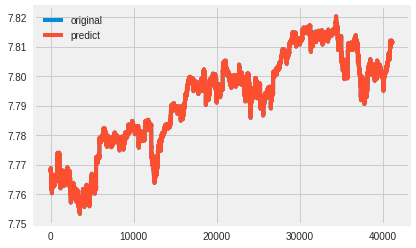

In [0]:
plt.plot(data['logsp500'][1:], label='original')
plt.plot(data.predict[1:], label='predict')
plt.legend()

In [0]:
np.mean(np.abs(np.array((data['logsp500'][1:] - data['predict'][1:]))))

0.00012710904304739175

In [0]:
numofsteps = 10
stepahead = ARIMIAmod.forecast(numofsteps)[0]
ferrors = ARIMIAmod.forecast(numofsteps)[2]
ferrors

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


array([[7.8110021 , 7.81188279],
       [7.8108209 , 7.81207587],
       [7.81068852, 7.81221298],
       [7.81057756, 7.81232677],
       [7.81047967, 7.81242695],
       [7.810391  , 7.81251777],
       [7.81030935, 7.81260154],
       [7.81023328, 7.81267972],
       [7.8101618 , 7.81275331],
       [7.81009417, 7.81282305]])

In [0]:
stepahead

array([7.81144245, 7.81144838, 7.81145075, 7.81145216, 7.81145331,
       7.81145439, 7.81145545, 7.8114565 , 7.81145755, 7.81145861])

In [0]:
data['error'] = (data['logsp500'] - data['predict'])
data['sqrError'] = np.square(data['error'])
data['absError'] = np.abs(data['error'])

In [0]:
data.head()

,DATE,DATE_F,SP500,logsp500,diflogsp500,predict,error,sqrError,absError
0,1491226200,2017-04-03 13:30:00,2363.6101,7.767945,-0.000207,NaN,NaN,NaN,NaN
1,1491226260,2017-04-03 13:31:00,2364.1001,7.768153,0.000601,7.767946,0.000206,4.253346e-08,0.000206
2,1491226320,2017-04-03 13:32:00,2362.6799,7.767552,-0.000690,7.768157,-0.000605,3.660918e-07,0.000605
3,1491226380,2017-04-03 13:33:00,2364.3101,7.768242,-0.000228,7.767537,0.000705,4.966489e-07,0.000705
4,1491226440,2017-04-03 13:34:00,2364.8501,7.768470,-0.000326,7.768271,0.000199,3.954221e-08,0.000199


Text(0.5, 0, 'Month')

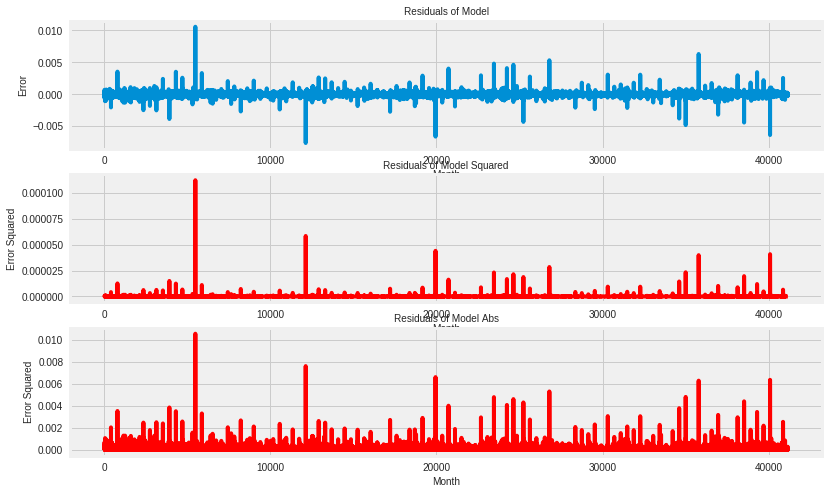

In [0]:
fig, ax = plt.subplots(figsize=(12,8))

plt.subplot(3, 1, 1)
plt.plot(data.error, label = "Residual")
plt.title("Residuals of Model", size = 10,)
plt.ylabel("Error", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 2)
plt.plot(data.sqrError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Squared", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)

plt.subplot(3, 1, 3)
plt.plot(data.absError, label = 'Residual Squared', color = 'r')
plt.title("Residuals of Model Abs", size = 10,)
plt.ylabel("Error Squared", size = 10)
plt.xlabel('Month', size = 10)


Text(0, 0.5, 'ACF')

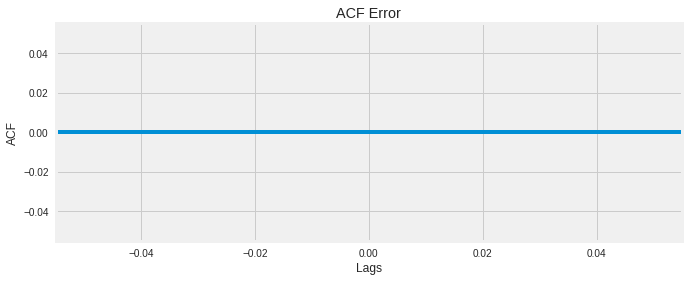

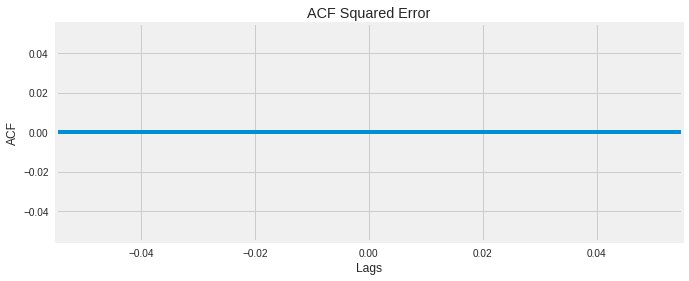

In [0]:
fig, ax = plt.subplots(figsize=(10,4))

plot_acf(data.error, lags = 25, ax = ax)
ax.set_title('ACF Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

fig, ax = plt.subplots(figsize=(10,4))

plot_acf(data.sqrError, lags = 25, ax = ax)
ax.set_title('ACF Squared Error')
ax.set_xlabel('Lags')
ax.set_ylabel('ACF')

Text(0, 0.5, 'PACF')

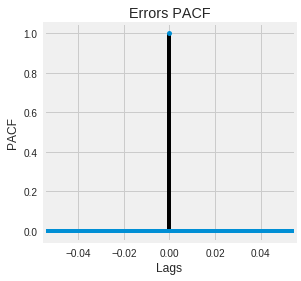

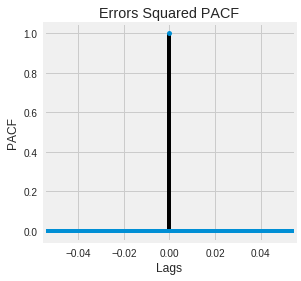

In [0]:
fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.error, lags = 25, ax = ax)
ax.set_title('Errors PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

fig, ax = plt.subplots(figsize=(4,4))

plot_pacf(data.sqrError, lags = 25, ax = ax)
ax.set_title('Errors Squared PACF')
ax.set_xlabel('Lags')
ax.set_ylabel('PACF')

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


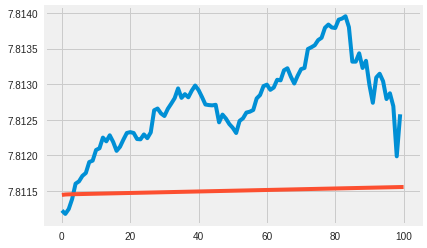

In [0]:
plt.plot(test.reset_index().logsp500)
plt.plot(ARIMIAmod.predict(start=data.shape[0], end=data.shape[0]+100, typ='levels'))

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


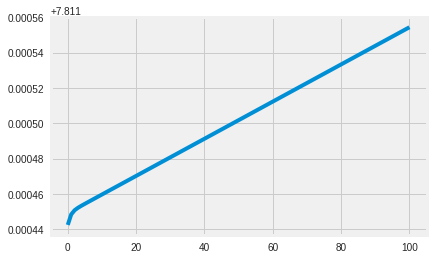

In [0]:
plt.plot(ARIMIAmod.predict(start=data.shape[0], end=data.shape[0]+100, typ='levels'))

In [0]:
test = test.reset_index()

In [0]:
?ARIMIAmod.forecast

In [0]:
ARIMIAmod.forecast(1)[0]

array([7.81144245])

In [0]:
ararray = list(data.logsp500.values)
ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):


In [0]:
test_logsp500 = list(test.logsp500.values)

In [0]:
ararray = list(data.logsp500.values)
test_predict = []
for i in range(99):
    print(i)
    ARIMIAmod = ARIMA(ararray, (p,d,q)).fit()
    test_predict.append(ARIMIAmod.forecast(1)[0])
    ararray.append(test_logsp500[i])

0


/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:646: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:650: FutureWarning: Conversion of the second argument of issubdtype from `complex` to `np.complexfloating` is deprecated. In future, it will be treated as `np.complex128 == np.dtype(complex).type`.
  elif issubdtype(paramsdtype, complex):
/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/kalmanf/kalmanfilter.py:577: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if issubdtype(paramsdtype, float):


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


16
17
18
19
20
21
22
23
24
25
26
27
28
29
30


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


31
32
33
34
35
36
37


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


68
69
70
71
72
73
74
75
76
77
78
79


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


80
81
82
83
84
85


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


86
87
88
89
90
91
92
93
94


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


95
96
97
98


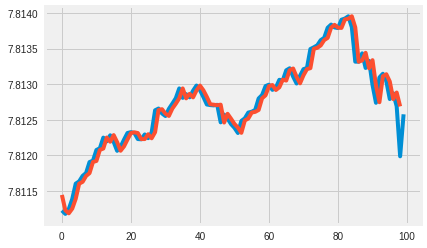

In [0]:
plt.plot(test_logsp500)
plt.plot(np.array(test_predict).ravel())

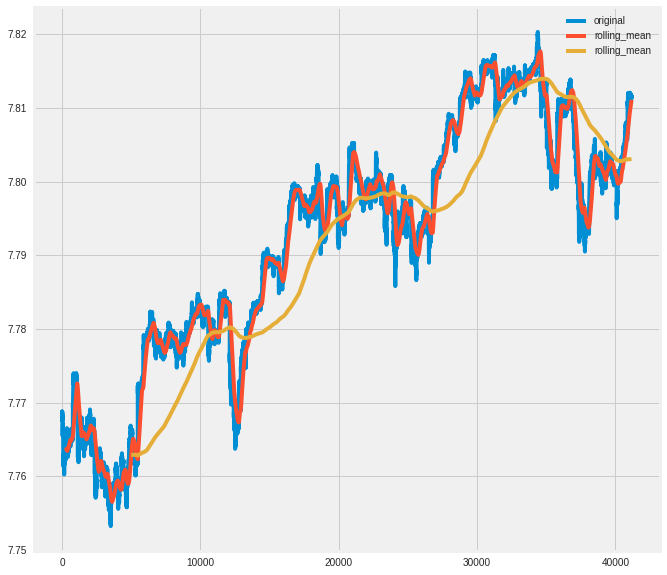

In [0]:
plt.figure(figsize=(10,10))
plt.plot(data.logsp500, label='original')
plt.plot(data.logsp500.rolling(300).mean(), label='rolling_mean')
plt.plot(data.logsp500.rolling(5000).mean(), label='rolling_mean')
plt.legend()

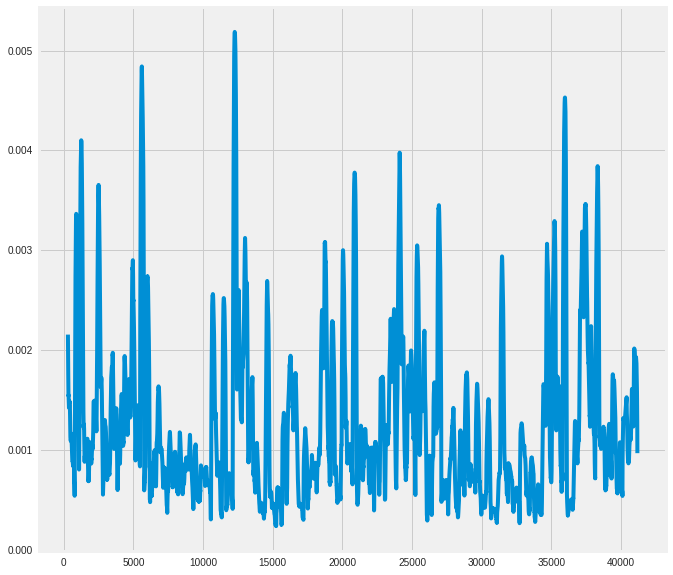

In [0]:
plt.figure(figsize=(10,10))
plt.plot(data.logsp500.rolling(300).std())